In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

sns.set(rc={'figure.figsize':(20,20)})

current_dir = os.path.abspath('')
parent_dir = os.path.dirname(current_dir)

In [2]:
companies_activity = pd.read_csv(os.path.join(parent_dir, 'datasets', 'company-bankruptcy-prediction', 'data.csv'))
companies_activity.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
cols = companies_activity.columns.to_list()
cols = cols[1:] + cols[:1]
companies_activity = companies_activity[cols]
cols[:-1] = [f'C{i+1}' for i, _ in enumerate(cols[:-1])]
cols[-1] = 'Bankrupt'
companies_activity.columns = cols
companies_activity.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C87,C88,C89,C90,C91,C92,C93,C94,C95,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490,1


In [4]:
# проверка на NaN-ы
for i in companies_activity.columns:
    if companies_activity[i].isnull().values.any():
        print(i)
        companies_activity[i].fillna(companies_activity[i].mean(), axis=0, inplace=True)

In [5]:
# разделение на train и test
train, test = np.split(companies_activity.sample(frac=1), [int(0.8*len(companies_activity))])

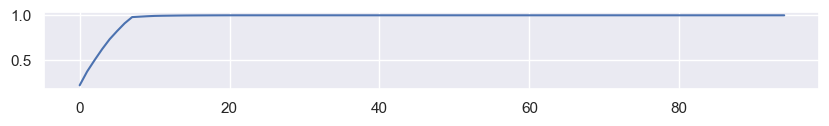

In [6]:
# количество признаков, необходимых для описания дисперсии данных
sample = train.drop('Bankrupt', axis=1)
pca_sample = PCA()
sample = pca_sample.fit_transform(sample)
plt.figure(figsize=(10,1))
plt.plot(np.cumsum(pca_sample.explained_variance_ratio_))

In [7]:
# StandardScaler и PCA
def preprocessing(df):
    x = df.drop('Bankrupt', axis=1)
    y = df['Bankrupt']
    sc = StandardScaler()
    sc.fit_transform(x)
    pca = PCA(n_components=10)
    x = pca.fit_transform(x)
    return x, y

In [8]:
# обучение моделей
X_train, Y_train = preprocessing(train)
X_test, Y_test = preprocessing(test)

model_0 = KNeighborsClassifier()
model_0.fit(X_train, Y_train)

model_1 = LogisticRegression()
model_1.fit(X_train, Y_train)

model_2 = GaussianNB()
model_2.fit(X_train, Y_train)

model_3 = SVC()
model_3.fit(X_train, Y_train)

model_4 = DecisionTreeClassifier()
model_4.fit(X_train, Y_train)

DecisionTreeClassifier()

In [9]:
# тестирование моделей
print(
    f'Точность {model_0} составляет {accuracy_score(Y_test, model_0.predict(X_test))}\n'
    f'Точность {model_1} составляет {accuracy_score(Y_test, model_1.predict(X_test))}\n'
    f'Точность {model_2} составляет {accuracy_score(Y_test, model_2.predict(X_test))}\n'
    f'Точность {model_3} составляет {accuracy_score(Y_test, model_3.predict(X_test))}\n'
    f'Точность {model_4} составляет {accuracy_score(Y_test, model_4.predict(X_test))}'
)

Точность KNeighborsClassifier() составляет 0.969208211143695
Точность LogisticRegression() составляет 0.5476539589442815
Точность GaussianNB() составляет 0.967741935483871
Точность SVC() составляет 0.9714076246334311
Точность DecisionTreeClassifier() составляет 0.9142228739002932
